In [43]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt

In [69]:
holidays_events = pd.read_csv("https://www.dropbox.com/s/bxyamlpevkiwwoq/holidays_events.csv?dl=1")
oil = pd.read_csv("https://www.dropbox.com/s/l6ln0ztl4m0pw3a/oil.csv?dl=1")
sample_submission = pd.read_csv("https://www.dropbox.com/s/68jjl61x6u3klos/sample_submission.csv?dl=1")
stores = pd.read_csv("https://www.dropbox.com/s/lcxn6r9bs2exguq/stores.csv?dl=1")
test = pd.read_csv("https://www.dropbox.com/s/cvdo1gn7r5lu2uz/test.csv?dl=1",index_col='id')
train = pd.read_csv("https://www.dropbox.com/s/s8p2b5awnuqfk0d/train.csv?dl=1",index_col='id')
transactions = pd.read_csv("https://www.dropbox.com/s/92fij9bcwt0e0cj/transactions.csv?dl=1")

C:\Users\ndzad\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Zbiór holidays_events zawiera informacje o świętach.
date - data święta (od 2012-03-02 do 2017-12-26)
type - typ święta: Addition, Bridge, Event, Transfer, Holiday, Work Day
locale - Local, National, Regional
locale_name - nazwa jednostki administracyjnej odpowiedniej dla zmiennej 'locale'
description - opis święta
transferred - zmienna binarna, gdy święto zostało przesunięte na inny dzień

In [3]:
holidays_events.head(10)

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
5,2012-05-12,Holiday,Local,Puyo,Cantonizacion del Puyo,False
6,2012-06-23,Holiday,Local,Guaranda,Cantonizacion de Guaranda,False
7,2012-06-25,Holiday,Regional,Imbabura,Provincializacion de Imbabura,False
8,2012-06-25,Holiday,Local,Latacunga,Cantonizacion de Latacunga,False
9,2012-06-25,Holiday,Local,Machala,Fundacion de Machala,False


Zbiór oil zawiera informacje o cenach ropy.
date - data raportu (od 2013-01-01 do 2017-08-31)
dcoilwtico - cena ropy w dolarach

In [15]:
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


Zbiór sample_submission to zbiór techniczny

Zbiór stores zawiera informacje o sklepach:
store_nbr - id sklepu
city - miasto lokalizacji
state - stan
type - rodzaj sklepu: A, B, C, D, E
cluster - grupa podobnych sklepów

In [19]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


Zbiór test zawiera informacje o zakupionych produktach:
1. id - id produktu
2. date - data sprzedaży (pierwsza data 15 dni od ostatniej daty ze zbioru train)
3. store_nbr - id sklepu
4. family - rodzaj zakupionej rzeczy
5. onpromotion - liczba produktów w danej 'family' na promocji w dnaym sklepie w danym sklepie

In [35]:
test.head(10)

,date,store_nbr,family,onpromotion
id,,,,
3000888,2017-08-16,1,AUTOMOTIVE,0
3000889,2017-08-16,1,BABY CARE,0
3000890,2017-08-16,1,BEAUTY,2
3000891,2017-08-16,1,BEVERAGES,20
3000892,2017-08-16,1,BOOKS,0
3000893,2017-08-16,1,BREAD/BAKERY,12
3000894,2017-08-16,1,CELEBRATION,0
3000895,2017-08-16,1,CLEANING,25
3000896,2017-08-16,1,DAIRY,45


Zbiór train zawiera informacje o zakupionych produktach:
1. id - id produktu
2. date - data sprzedaży
3. store_nbr - id sklepu
4. family - rodzaj zakupionej rzeczy
5. sales - liczba zakupionych produktów z danej 'family' w danym dniu i sklepie
6. onpromotion - liczba produktów w danej 'family' na promocji w danym dniu i sklepie

In [34]:
train.tail(10)

,date,store_nbr,family,sales,onpromotion
id,,,,,
3000878,2017-08-15,9,MAGAZINES,11.000,0
3000879,2017-08-15,9,MEATS,449.228,0
3000880,2017-08-15,9,PERSONAL CARE,522.000,11
3000881,2017-08-15,9,PET SUPPLIES,6.000,0
3000882,2017-08-15,9,PLAYERS AND ELECTRONICS,6.000,0
3000883,2017-08-15,9,POULTRY,438.133,0
3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


Zbiór transactions zawiera informacje o liczbie transakcji w danym sklepie i dniu:
data - data
store_nbr - id sklepu
transactions - liczba transakcji

In [36]:
transactions.head(10)

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
5,2013-01-02,5,1903
6,2013-01-02,6,2143
7,2013-01-02,7,1874
8,2013-01-02,8,3250
9,2013-01-02,9,2940


In [86]:
#Funkcja pomocniczna do rysowania wykresów
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100, axiscolor ='black'):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.gca().title.set_color(axiscolor)
    plt.gca().xaxis.label.set_color(axiscolor)
    plt.gca().yaxis.label.set_color(axiscolor)
    plt.tick_params(colors=axiscolor, which='both')
    plt.show()

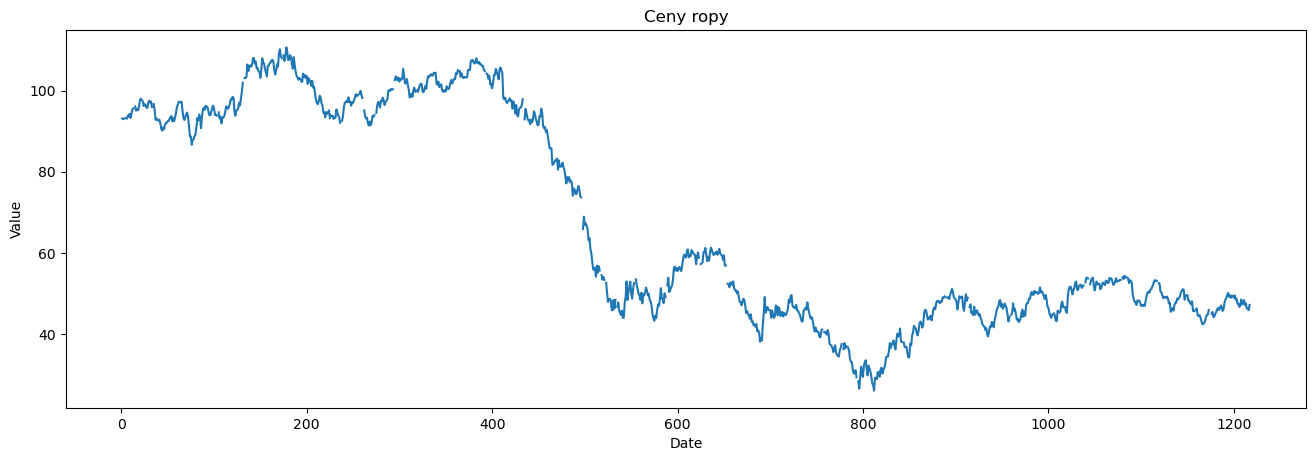

In [102]:
plot_df(oil,x=oil.index, y=oil.dcoilwtico, title='Ceny ropy', axiscolor='black')

In [101]:
oil.isna().sum()

date           0
dcoilwtico    43
dtype: int64

Zauważmy, że w danych o ropie są braki w cenach . Jednym z zadań musi być interpolacja danych w celu uzupełnienia braków danych.

In [96]:
train.isna().sum()

date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [97]:
test.isna().sum()

date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64

In [98]:
holidays_events.isna().sum()

date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

In [99]:
stores.isna().sum()

store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

In [100]:
transactions.isna().sum()

date            0
store_nbr       0
transactions    0
dtype: int64